# Projet 6
### Sommaire:

**Préparation:**
- <a href="#C1">Importation des données</a>
- <a href="#C2">Préparation des données : table customers</a>
- <a href="#C3">Préparation des données : table products</a>
- <a href="#C4">Préparation des données : table transactions</a>
- <a href="#C5">Préparation du dataframe final</a>

**Analyse du chiffre d'affaires:**
- <a href="#C6">Chiffre d'affaires annuel</a>
- <a href="#C7">Chiffre d'affaires par catégorie</a>
- <a href="#C8">Les tops et flops des ventes de produits</a>

**Analyse des clients:**
- <a href="#C9">Le lien entre le genre d’un client et les catégories des livres achetés</a>
- <a href="#C10">Analyze du panier via courbe de Lorezn et coefficient de Gini</a>
- <a href="#C11">Analyze par rapport à l'age du client</a>
- <a href="#C12">Le lien entre l’âge des clients et le montant total des achats</a>
- <a href="#C13">Le lien entre l’âge des clients et le panier moyen</a>
- <a href="#C14">Le lien entre l’âge des clients et la fréquence d'achat</a>
- <a href="#C15">Le lien entre l’âge des clients et la catégorie de produit</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C1">Importation des données</a>

In [2]:
customers = pd.read_csv(r'C:\Users\jorda\Desktop\P6\customers.csv')
products = pd.read_csv(r'C:\Users\jorda\Desktop\P6\products.csv')
transactions = pd.read_csv(r'C:\Users\jorda\Desktop\P6\transactions.csv')

## <a name="C2">Préparation des données : table customers</a>

In [3]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_6559,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


La date de naissance va de 1929 à 2004, donc pas de problème. La colonne sex à 2 valeurs possible f et m donc pas de problème aussi, on va regarder maintenant les doublons.

In [6]:
customers.loc[customers['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


Pas de doublon, donc la table est prête à être utilisé. On passe à la table suivante.
## <a name="C3">Préparation des données : table products</a>

In [7]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [9]:
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,1_410,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Il y a 3 catégories de produits notés de 0 à 2, la colonne price semble posé problème puisqu'il y a déjà une valeur négative, à moins que les réductions soit catégorisé comme produit. On va donc voir ça et avant, on va rechercher des doublons éventuels.

In [10]:
products.loc[products['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


Il n'y a pas de doublon, on va donc regarder ce que ça donne au niveau de la colonne prix.

In [11]:
products[products['price'] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


On va regarder dans la table transaction si on a une idée de ce que ça peut-être

In [12]:
transactions[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [13]:
transactions[transactions['id_prod'] == 'T_0'].describe(include="all")

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


il semblerait que ce soit une session de test, donc je vais effacer la donnée.

In [14]:
products = products[products['id_prod'] != 'T_0']
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


Pour finir sur cette table on, va regarder les outliers

<AxesSubplot:>

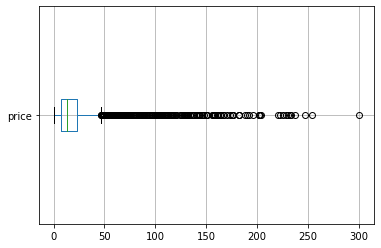

In [15]:
products.boxplot(column="price", vert=False)

Pour moi, il n'y a rien d'anormal au niveau prix une édition reliée d'un gros livre peu coûté 300€ facilement donc pas de problème.

## <a name="C4">Préparation des données : table transactions</a>

In [16]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [17]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


On sait déjà qu'il y a des transactions test avec une somme de -1€, on va les éliminer.

In [19]:
transactions[transactions['date'].str.contains("test" , na=False)]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il y en a 200 comme tout à l'heure, on va les retirer.

In [20]:
transactions = transactions[~transactions['date'].str.contains("test" , na=False)]
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


Maintenant l'autre problème est le format date

In [21]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


<ipython-input-21-2a8c0c2d6a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['date'] = pd.to_datetime(transactions['date'])


In [22]:
transactions.loc[transactions[['id_prod', 'date', 'session_id','client_id' ]].duplicated(keep=False),:]

,id_prod,date,session_id,client_id


## <a name="C5">Préparation du dataframe final</a>

In [23]:
dataf = pd.merge(transactions, customers, on='client_id',how='outer',  indicator=True )
dataf[dataf['_merge'] != 'both'].describe(include='all')

,id_prod,date,session_id,client_id,sex,birth,_merge
count,0,0,0,23,23,23.000000,23
unique,0,0,0,23,2,NaN,1
top,NaN,NaN,NaN,c_3789,f,NaN,right_only
freq,NaN,NaN,NaN,1,12,NaN,23
mean,NaN,NaN,NaN,NaN,NaN,1985.826087,NaN
std,NaN,NaN,NaN,NaN,NaN,19.548662,NaN
min,NaN,NaN,NaN,NaN,NaN,1956.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1964.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1997.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2001.000000,NaN


On a des clients enregistrés qui n'aurai pas fait d'achat. Je les supprime de mon dataframe final

In [24]:
dataf = dataf[dataf['_merge'] == 'both']
dataf = dataf.drop('_merge', axis=1)
dataf

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986
...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996


Maintenant, on va ajouter les produits.

In [25]:
dataf = pd.merge(dataf, products, on='id_prod',how='outer',  indicator=True )
dataf[dataf['_merge'] != 'both']

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaT,NaN,NaN,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaT,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaT,NaN,NaN,NaN,NaN,23.66,0.0,right_only


On a des produits non vendu que l'on va supprimer du dataframe final et mettre dans un dataframe à part si jamais c'est utile par la suite. On va aussi regarder du côté des transactions sans produits.

In [26]:
produit_non_vendu = dataf[dataf['_merge'] == 'right_only']
produit_non_vendu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 679332 to 679352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21 non-null     object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   0 non-null      object        
 4   sex         0 non-null      object        
 5   birth       0 non-null      float64       
 6   price       21 non-null     float64       
 7   categ       21 non-null     float64       
 8   _merge      21 non-null     category      
dtypes: category(1), datetime64[ns](1), float64(3), object(4)
memory usage: 1.6+ KB


In [27]:
dataf[dataf['_merge'] == 'left_only'].describe(include='all')

<ipython-input-27-353b86c2801b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataf[dataf['_merge'] == 'left_only'].describe(include='all')


,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
count,221,221,221,221,221,221.000000,0.0,0.0,221
unique,1,221,221,100,2,NaN,NaN,NaN,1
top,0_2245,2022-08-16 05:53:01.627491,s_236282,c_1533,f,NaN,NaN,NaN,left_only
freq,221,1,1,6,117,NaN,NaN,NaN,221
first,NaN,2021-03-01 00:09:29.301897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-02-21 04:06:19.106398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1977.782805,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10.837556,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1933.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1973.000000,NaN,NaN,NaN


Il s'agit d'un seul produit avec la référence 0_2245, le premier chiffre avant le underscore correspond à sa classe donc on va déjà essayer de chercher un produit contenant 2245

In [28]:
produit_non_vendu[produit_non_vendu['id_prod'].str.contains("2245" , na=False)]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge


Comme on ne le retrouve pas et que le nombre de lignes est très faible on va donc supprimer ces lignes

In [29]:
dataf = dataf[dataf['_merge'] == 'both']
dataf = dataf.drop('_merge', axis=1)
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   sex         679111 non-null  object        
 5   birth       679111 non-null  float64       
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


In [30]:
dataf.describe(include='all')

<ipython-input-30-c7ce0a5fd5c6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataf.describe(include='all')


,id_prod,date,session_id,client_id,sex,birth,price,categ
count,679111,679111,679111,679111,679111,679111.000000,679111.000000,679111.000000
unique,3265,679111,342275,8600,2,NaN,NaN,NaN
top,1_369,2021-11-15 23:55:44.545976,s_118668,c_1609,m,NaN,NaN,NaN
freq,2252,1,14,25488,340826,NaN,NaN,NaN
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-02-28 23:58:30.792755,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1977.811149,17.454773,0.441953
std,NaN,NaN,NaN,NaN,NaN,13.575361,18.328998,0.595042
min,NaN,NaN,NaN,NaN,NaN,1929.000000,0.620000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1970.000000,8.870000,0.000000


Le travail de préparation est fini.

In [31]:
dataf

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0


# Analyse du chiffre d'affaires
## <a name="C6">Chiffre d'affaires annuel</a>

In [32]:
table = pd.pivot_table(data=dataf, index='categ',columns=dataf["date"].dt.year, values='price', aggfunc='sum')
table = table.rename(index={0.0: "CA catégorie 0.0",1.0: "CA catégorie 1.0",2.0: "CA catégorie 2.0"})
display(table.style.format('{:,.2f} €'))
table2 = pd.pivot_table(data=dataf,columns=dataf["date"].dt.year, values='price', aggfunc='sum')
table2 = table2.rename(index={"price": "chiffre d'affaires"})
display(table2.style.format('{:,.2f} €'))
print("Les dates vont du 1/03/2021 au 28/02/2023, donc seule l'année 2022 est complète")

date,2021,2022,2023
categ,,,
CA catégorie 0.0,"1,883,020.45 €","2,192,970.46 €","343,740.06 €"
CA catégorie 1.0,"1,777,995.85 €","2,485,275.19 €","390,451.65 €"
CA catégorie 2.0,"1,109,810.26 €","1,430,436.16 €","240,028.60 €"


date,2021,2022,2023
chiffre d'affaires,"4,770,826.56 €","6,108,681.81 €","974,220.31 €"


Les dates vont du 1/03/2021 au 28/02/2023, donc seule l'année 2022 est complète


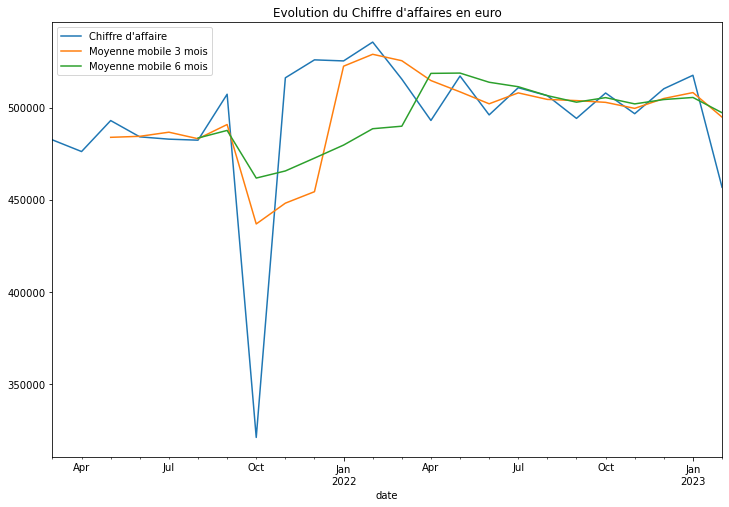

In [33]:
ca = dataf.filter(items =['date','price'])
ca.sort_values(by='date', inplace=True)
ca['date'] = pd.to_datetime(ca['date'])

requete  = ca.groupby(pd.Grouper(key='date', freq='1M'))['price'].sum()
requete = pd.DataFrame(requete)
requete['mm ca 3'] = requete['price'].rolling(3).mean()
requete['mm ca 6'] = requete['price'].rolling(6).mean()

requete.plot(figsize=(12, 8))

plt.legend(['Chiffre d\'affaire', 'Moyenne mobile 3 mois', 'Moyenne mobile 6 mois'])
plt.title('Evolution du Chiffre d\'affaires en euro')

plt.show()

On remarque un creux dans le mois d'octobre 2021, et une tendance plutôt stable du chiffre d'affaires

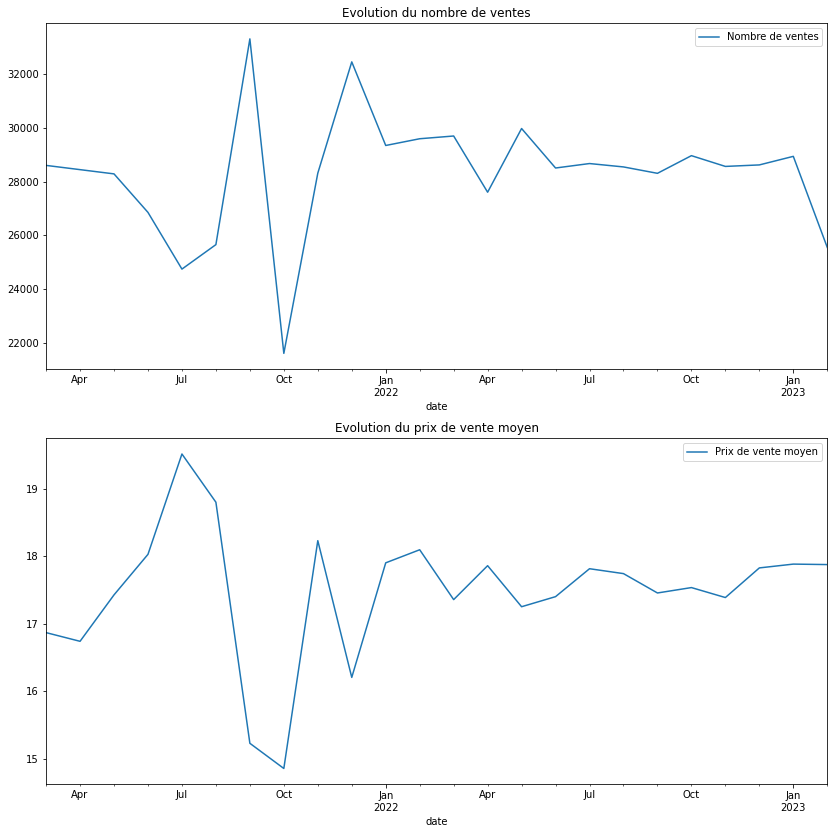

In [34]:
plt.figure(figsize=(14, 14))
plt.subplot(2, 1, 1)
requete  = ca.groupby(pd.Grouper(key='date', freq='1M'))['price'].count()
requete.plot()
plt.legend(['Nombre de ventes'])
plt.title('Evolution du nombre de ventes')

plt.subplot(2, 1, 2)
requete  = ca.groupby(pd.Grouper(key='date', freq='1M'))['price'].mean()
requete.plot()
plt.legend(['Prix de vente moyen'])
plt.title('Evolution du prix de vente moyen')
plt.show()

Un premier commentaire, le CA baisse au mois d'octobre 2021 à cause de plusieurs facteurs, une baisse des ventes en volume et en valeur. On va voir par la suite si les catégories de produits ont aussi joué un rôle. Mais avant cela, on remarque que le mois de juillet 2021 a été mauvais en nombre de vente, mais compensé par des produits vendus plus chères. On va faire un petit focus sur le mois d'octobre.

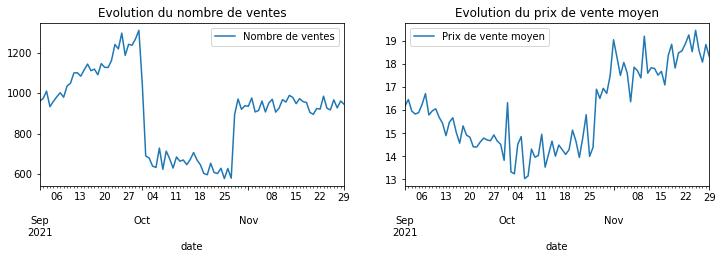

In [35]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

requete2 = ca[(ca['date']  >= '2021-09-01') & (ca['date'] < '2021-11-30')]
requete  = requete2 .groupby(pd.Grouper(key='date', freq='1d'))['price'].count()
requete.plot()
plt.legend(['Nombre de ventes'])
plt.title('Evolution du nombre de ventes')
plt.subplot(1, 2, 2)
requete  = requete2 .groupby(pd.Grouper(key='date', freq='1d'))['price'].mean()
requete.plot()
plt.legend(['Prix de vente moyen'])
plt.title('Evolution du prix de vente moyen')
plt.show()

La chute du nombre de ventes est vraiment brutale, ainsi que ça remonté, il faudrait d'autre donnée pour avoir une explication fiable (rupture de stock de certains produits, bug du site de vente en ligne, etc...). On va voir maintenant le CA par catégorie et peut-être avoir une explication.

## <a name="C7">Chiffre d'affaires par catégorie</a>

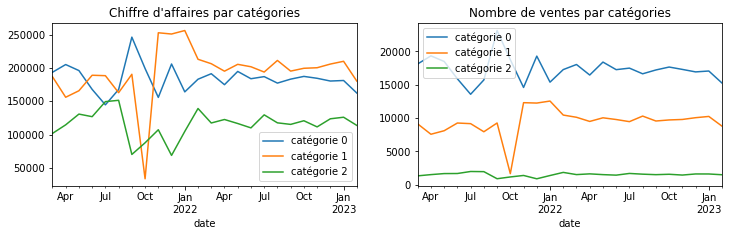

price                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

In [36]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

cat1 = dataf[dataf['categ'] == 0.0].filter(items =['date', 'price'])
cat1 = cat1.groupby(pd.Grouper(key='date', freq='1M'))['price'].sum()
cat1.plot(label='catégorie 0')
cat2 = dataf[dataf['categ'] == 1.0].filter(items =['date', 'price'])
cat2 = cat2.groupby(pd.Grouper(key='date', freq='1M'))['price'].sum()
cat2.plot(label='catégorie 1')
cat3 = dataf[dataf['categ'] == 2.0].filter(items =['date', 'price'])
cat3 = cat3.groupby(pd.Grouper(key='date', freq='1M'))['price'].sum()
cat3.plot(label='catégorie 2')
plt.legend()
plt.title('Chiffre d\'affaires par catégories')

plt.subplot(1, 2, 2)

cat1 = dataf[dataf['categ'] == 0.0].filter(items =['date', 'price'])
cat1 = cat1.groupby(pd.Grouper(key='date', freq='1M'))['price'].count()
cat1.plot(label='catégorie 0')
cat2 = dataf[dataf['categ'] == 1.0].filter(items =['date', 'price'])
cat2 = cat2.groupby(pd.Grouper(key='date', freq='1M'))['price'].count()
cat2.plot(label='catégorie 1')
cat3 = dataf[dataf['categ'] == 2.0].filter(items =['date', 'price'])
cat3 = cat3.groupby(pd.Grouper(key='date', freq='1M'))['price'].count()
cat3.plot(label='catégorie 2')
plt.legend()
plt.title('Nombre de ventes par catégories')
plt.show()

products.groupby('categ').describe()

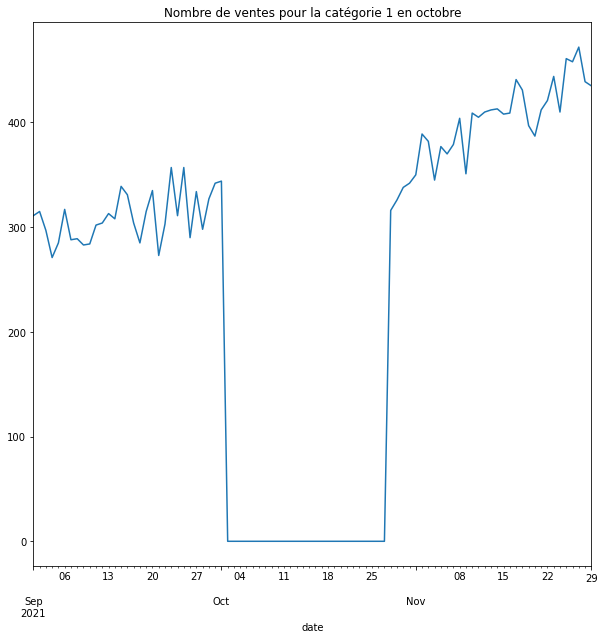

In [37]:
octobre_cat = dataf[(dataf['categ'] == 1.0) & 
                    (dataf['date']  >= '2021-09-01') &
                    (dataf['date'] < '2021-11-30')].filter(items =['date', 'price'])
octobre_cat = octobre_cat.groupby(pd.Grouper(key='date', freq='1d'))['price'].count()
octobre_cat.plot(figsize=(10, 10))
plt.title('Nombre de ventes pour la catégorie 1 en octobre')
plt.show()



On comprend la chute du mois d'octobre 2021, la catégorie 1 est arrêté pendant plusieurs semaines, la cause n'est pas identifiable avec les données, peut-être une rupture de stock, un problème dans la collecte de données, un arrêt volontaire etc,...

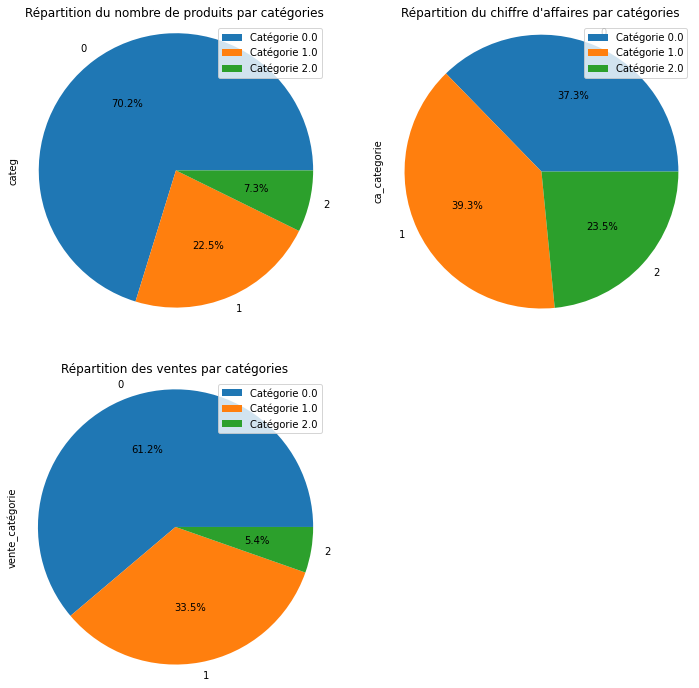

In [38]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('Répartition du nombre de produits par catégories')
products["categ"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['Catégorie 0.0' ,'Catégorie 1.0' ,'Catégorie 2.0'])

plt.subplot(2, 2, 2)

requete_ca_categ = dataf.groupby('categ').agg(ca_categorie=('price', 'sum'),
                                             vente_catégorie=('price', 'count'))
requete_ca_categ = requete_ca_categ.reset_index()

plt.title('Répartition du chiffre d\'affaires par catégories')
requete_ca_categ['ca_categorie'].plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.legend(['Catégorie 0.0' ,'Catégorie 1.0' ,'Catégorie 2.0'])
plt.subplot(2, 2, 3)
plt.title('Répartition des ventes par catégories')
requete_ca_categ['vente_catégorie'].plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.legend(['Catégorie 0.0' ,'Catégorie 1.0' ,'Catégorie 2.0'])


## <a name="C8">Les tops et flops des ventes de produits</a>

In [45]:
requete_produit = dataf.groupby('id_prod').agg(nbr_vendu=('id_prod', 'count'))
requete_produit = requete_produit.reset_index()

vente_produit = pd.merge(products, requete_produit, on='id_prod',how='outer',  indicator=True )
vente_produit.loc[vente_produit['_merge'] == 'left_only', 'nbr_vendu'] = 0
vente_produit = vente_produit.sort_values(by='nbr_vendu')
vente_produit['chiffre d\'affaires'] = vente_produit['price'] * vente_produit['nbr_vendu']
vente_produit = vente_produit.drop('_merge', axis=1)
print('Il y a',vente_produit[vente_produit['nbr_vendu'] == 0]['id_prod'].count(),'produits non vendus')

formatage = {'price':'{:,.2f} €', 'chiffre d\'affaires':'{:,.2f} €', 'nbr_vendu':'{:.0f}'}
display(vente_produit[vente_produit['nbr_vendu'] != 0][:10].style
        .format(formatage)
        .set_caption("Les 10 produits les moins vendus")
        .hide_index())
display(vente_produit[vente_produit['nbr_vendu'] != 0][-10:].style
        .format(formatage)
        .set_caption("Les 10 produits les plus vendus")
        .hide_index())
ca_total = dataf['price'].sum()
ca_top_ten = vente_produit.loc[vente_produit['nbr_vendu'] != 0, "chiffre d'affaires"][-10:].sum()
print("Part des produits du top 10 dans le ca=", "{0:.2%}".format(ca_top_ten / ca_total))

Il y a 21 produits non vendus


id_prod,price,categ,nbr_vendu,chiffre d'affaires
0_2201,20.99 €,0,1,20.99 €
0_1539,0.99 €,0,1,0.99 €
0_1601,1.99 €,0,1,1.99 €
0_1633,24.99 €,0,1,24.99 €
0_1498,2.48 €,0,1,2.48 €
0_1284,1.38 €,0,1,1.38 €
0_549,2.99 €,0,1,2.99 €
0_1683,2.99 €,0,1,2.99 €
2_81,86.99 €,2,1,86.99 €
0_807,1.99 €,0,1,1.99 €


id_prod,price,categ,nbr_vendu,chiffre d'affaires
1_407,15.99 €,1,1935,"30,940.65 €"
1_406,24.81 €,1,1939,"48,106.59 €"
1_413,17.99 €,1,1945,"34,990.55 €"
1_412,16.65 €,1,1951,"32,484.15 €"
1_403,17.99 €,1,1960,"35,260.40 €"
1_425,16.99 €,1,2096,"35,611.04 €"
1_498,23.37 €,1,2128,"49,731.36 €"
1_414,23.83 €,1,2180,"51,949.40 €"
1_417,20.99 €,1,2189,"45,947.11 €"
1_369,23.99 €,1,2252,"54,025.48 €"


Part des produits du top 10 dans le ca= 3.54%


## Analyse des clients
## <a name="C9">Le lien entre le genre d’un client et les catégories des livres achetés</a>

sex,f,m
categ,,
0.0,206103,209356
1.0,114899,112270
2.0,17283,19200


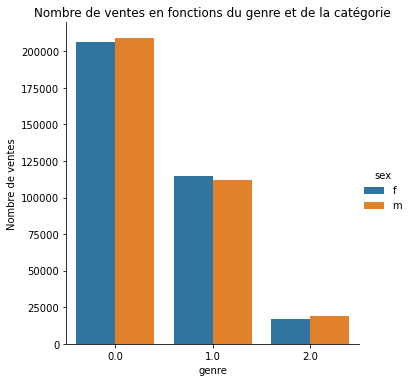

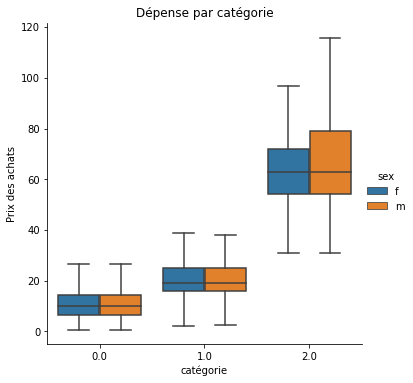

In [51]:
genre_catégorie = pd.pivot_table(data=dataf, index='categ',columns=dataf['sex'], values='price', aggfunc='count')
display(genre_catégorie)

g = sns.catplot( x="categ",hue="sex", kind="count", data=dataf)
g.set(title="Nombre de ventes en fonctions du genre et de la catégorie", 
      xlabel='genre', ylabel='Nombre de ventes' )

g2=sns.catplot(x="categ", y="price", hue="sex", kind="box", data=dataf,showfliers = False)
g2.set(title="Dépense par catégorie", 
      xlabel='catégorie', ylabel='Prix des achats' )
plt.show()

Pour moi il n'y a pas de différence significative entre les genres. On va confirmer par un test:

In [47]:
import scipy.stats as st
from scipy.stats import chi2_contingency

cont = dataf[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len).astype(int)
display(cont)
stat_chi2, p_value, degre_liberte, st_exp = chi2_contingency(cont)
print('p_value',p_value)

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


p_value 1.1310980597090762e-32


On rejette largement l'hypothèse d'indépendance, il y a donc bien un lien entre le genre et la catagorie de produit

categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


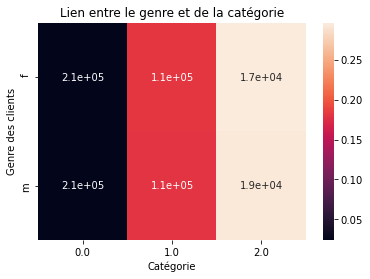

In [48]:
X = "sex"
Y = "categ"

cont = dataf[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
display(cont)

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataf)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
g = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
g.set(title="Lien entre le genre et de la catégorie", 
      xlabel='Catégorie', ylabel='Genre des clients' )

plt.show()

Le lien entre le genre et la catégorie est plus prononcé pour la catégorie 2

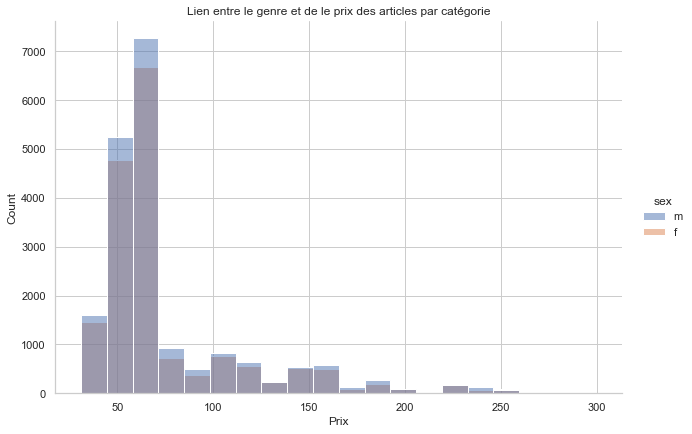

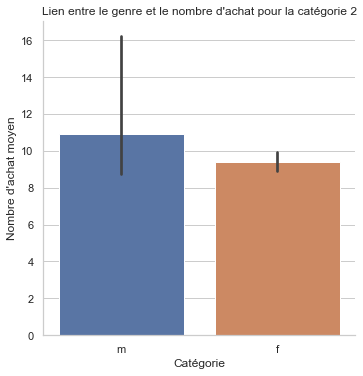

In [136]:
achat_cat_deux = dataf[dataf['categ'] == 2.0]

g1 = sns.displot(x="price" ,hue="sex", data=achat_cat_deux, bins=20,
              height=6, aspect=1.5)
g1.set(title="Lien entre le genre et de le prix des articles par catégorie", 
      xlabel='Prix' )

genre_achat = dataf[dataf['categ'] == 2.0]
genre_achat = genre_achat.groupby(['client_id','sex']).agg(price=('price', 'count'))
genre_achat = genre_achat.reset_index()

g2 = sns.catplot(x="sex", y="price", kind="bar", data=genre_achat)
g2.set(title="Lien entre le genre et le nombre d'achat pour la catégorie 2", 
      xlabel='Catégorie', ylabel='Nombre d\'achat moyen' )

## <a name="C10">Analyse du panier via courbe de Lorenz et coefficient de Gini</a>
J'ai ajouter aussi le top 10 des meilleurs clients.

,client_id,panier
7715,c_7959,5085.450000
7006,c_7319,5155.770000
1268,c_2140,5208.820000
2108,c_2899,5214.050000
634,c_1570,5271.620000
2513,c_3263,5276.870000
2724,c_3454,113637.930000
6337,c_6714,153598.920000
4388,c_4958,289760.340000
677,c_1609,324033.350000


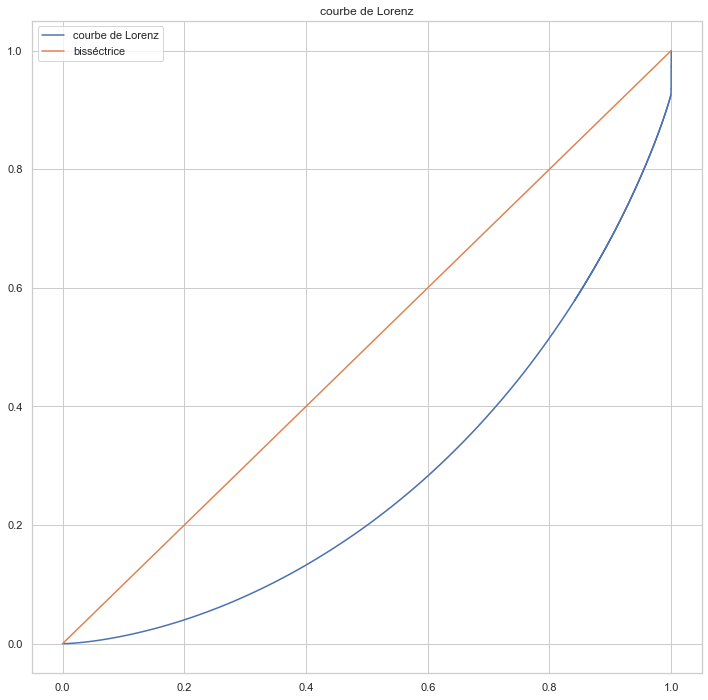

le coefficient de gini est de : 0.45


In [137]:
#courbe de lorenz et gini
ca_par_client = dataf.groupby(['client_id']).agg(panier=('price', 'sum'))
ca_par_client = ca_par_client.reset_index()
ca_par_client = ca_par_client.sort_values(by='panier')
display(ca_par_client[-10:].style.set_caption("Nos 10 meilleurs clients"))

n = len(ca_par_client)
lorenz = ca_par_client['panier'].cumsum() / ca_par_client['panier'].sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))

plt.figure(figsize=(12, 12))
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='courbe de Lorenz')
plt.plot([0,1], [0,1], label='bisséctrice')
plt.legend()
plt.title('courbe de Lorenz')
plt.show()

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
print('le coefficient de gini est de :',round(gini,2))

## <a name="C11">Analyse par rapport à l'age du client</a>

birth                                                                
      count         mean        std     min     25%     50%     75%     max
sex                                                                        
f    4491.0  1977.994879  17.098242  1929.0  1966.0  1979.0  1992.0  2004.0
m    4132.0  1978.591723  16.719656  1929.0  1966.0  1980.0  1992.0  2004.0

<Figure size 864x216 with 0 Axes>

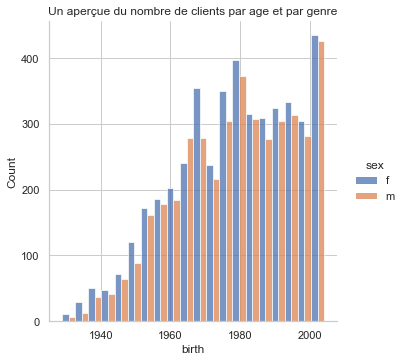

In [138]:
plt.figure(figsize=(12, 3))
sns.set(style="whitegrid") 
sns.displot(customers, x="birth", hue="sex", multiple="dodge", bins=20)
plt.title('Un aperçue du nombre de clients par age et par genre')
customers.groupby('sex').describe()

## <a name="C12">Le lien entre l’âge des clients et le montant total des achats</a>

coefficient de Pearson 0.039900177894994775


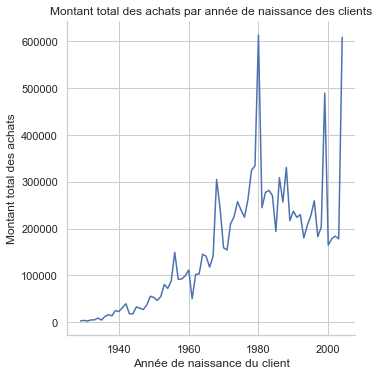

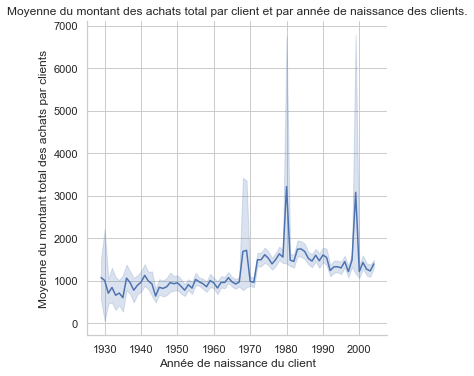

In [139]:
montant_total = dataf.groupby(['birth']).agg(total_achat=('price', 'sum'))
montant_total = montant_total.reset_index()
g1 = sns.relplot(x="birth", y="total_achat", kind="line", data=montant_total)
g1.set(title="Montant total des achats par année de naissance des clients", 
      xlabel='Année de naissance du client', ylabel='Montant total des achats' )

montant_total = dataf.groupby(['birth','client_id']).agg(total_achat=('price', 'sum'))
montant_total = montant_total.reset_index()
g2 = sns.relplot(x="birth", y="total_achat", kind="line", data=montant_total)
g2.set(title="Moyenne du montant des achats total par client et par année de naissance des clients.", 
      xlabel='Année de naissance du client', ylabel='Moyenne du montant total des achats par clients' )

print("coefficient de Pearson",  st.pearsonr(montant_total["birth"],montant_total["total_achat"])[0])      

Le 1er graphique a un défaut, on a l'information sur les ventes totales par âge, mais certaines catégories d'âges son surreprésenté ce qui rend l'information un peu moins pertinente. Le second esquive ce problème, on a la moyenne des montant total dépensé par clients et donc on ne tient pas compte des différences de population par âge.

## <a name="C13">Le lien entre l’âge des clients et le panier moyen</a>

coefficient de Pearson 0.6168497391314234


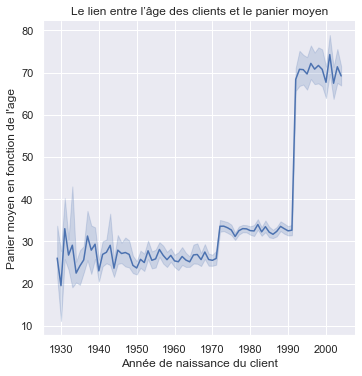

In [147]:
session = dataf.groupby(['birth','client_id','session_id']).agg(panier=('price','sum'))
session.reset_index()
panier_moyen_client = session.groupby(['birth','client_id']).agg(panier=('panier','mean'))


g = sns.relplot(x="birth", y="panier", kind="line", data=panier_moyen_client)
g.set(title="Le lien entre l’âge des clients et le panier moyen", 
      xlabel='Année de naissance du client', ylabel='Panier moyen en fonction de l\'age' )

panier_moyen_client = panier_moyen_client.reset_index()

print("coefficient de Pearson",  st.pearsonr(panier_moyen_client['birth'],panier_moyen_client["panier"])[0])      

[Text(0.5, 1.0, 'Le lien entre l’âge des clients et le panier moyen par catégorie')]

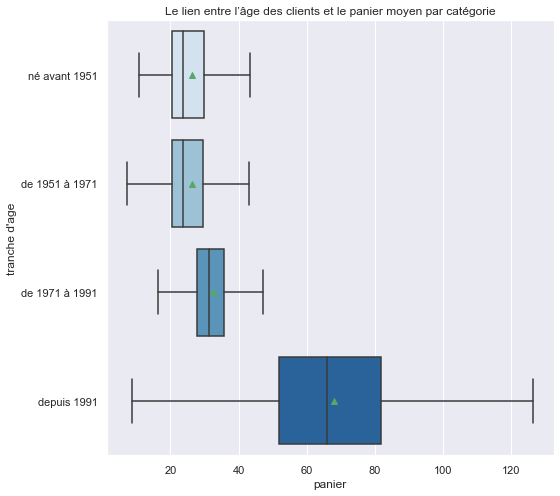

In [149]:
panier_moyen_client = panier_moyen_client.reset_index()
conditions = [ panier_moyen_client['birth']  < 1951,
                     (panier_moyen_client['birth'] >= 1951) & (panier_moyen_client['birth'] < 1971),
                     (panier_moyen_client['birth'] >= 1971) & (panier_moyen_client['birth'] < 1991),
                     panier_moyen_client['birth'] >= 1991 ]

choix =['né avant 1951','de 1951 à 1971','de 1971 à 1991','depuis 1991']

panier_moyen_client["tranche d'age"] =  np.select(conditions, choix)

sns.set(rc={"figure.figsize":(8, 8)})
g = sns.boxplot(x = 'panier',y='tranche d\'age', palette="Blues", data = panier_moyen_client
                ,showfliers = False
                ,showmeans=True)
g.set(title="Le lien entre l’âge des clients et le panier moyen par catégorie")

## <a name="C14">Le lien entre l’âge des clients et la fréquence d'achat</a>

coefficient de Pearson 0.12603125609658733


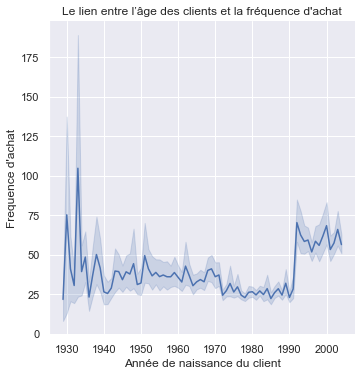

In [150]:
requete = dataf.filter(items=['birth','client_id','session_id','date','price'])
requete['date'] = pd.to_datetime(requete['date'].dt.date)
requete = requete.groupby(['birth','client_id','session_id','date']).agg(panier=('price','sum'))
requete = requete.sort_values(by="date")
requete = requete.reset_index()

requete = requete.groupby(['birth','client_id']).agg(nbr_panier=('panier','count'),
                                                                 date_premier_achat=('date','min'))
requete = requete.reset_index()
requete['frequence'] = -(requete['date_premier_achat'] - pd.to_datetime("2023-02-28")) / requete['nbr_panier']
requete['frequence']= requete['frequence'].astype('timedelta64[D]')
requete['frequence'].astype(int)

g = sns.relplot(x="birth", y="frequence", kind="line", data=requete)
g.set(title="Le lien entre l’âge des clients et la fréquence d'achat", 
      xlabel='Année de naissance du client', ylabel='Frequence d\'achat' )

print("coefficient de Pearson",  st.pearsonr(requete['birth'],requete["frequence"])[0])

[Text(0.5, 1.0, "Le lien entre l’âge des clients et la fréquence d'achat par catégorie"),
 Text(0.5, 0, 'Nombre de jours entre deux achats')]

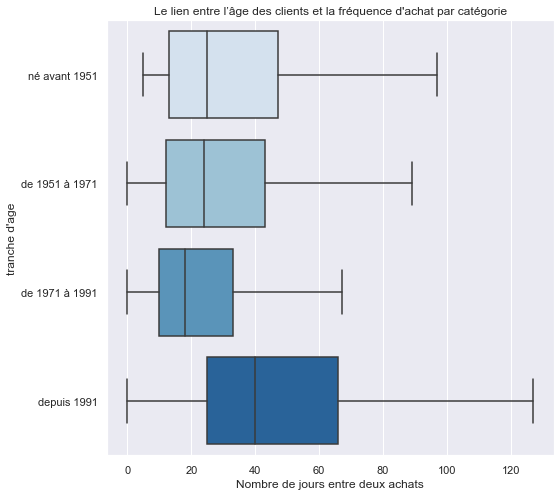

In [153]:
conditions = [ requete['birth']  < 1951,
                     (requete['birth'] >= 1951) & (requete['birth'] < 1971),
                     (requete['birth'] >= 1971) & (requete['birth'] < 1991),
                     requete['birth'] >= 1991 ]

choix =['né avant 1951','de 1951 à 1971','de 1971 à 1991','depuis 1991']

requete["tranche d'age"] =  np.select(conditions, choix)


g = sns.boxplot(x = 'frequence',y="tranche d'age", palette="Blues", data = requete , showfliers = False)
g.set(title="Le lien entre l’âge des clients et la fréquence d'achat par catégorie"
      ,xlabel='Nombre de jours entre deux achats')

## <a name="C15">Le lien entre l’âge des clients et la catégorie de produit</a>

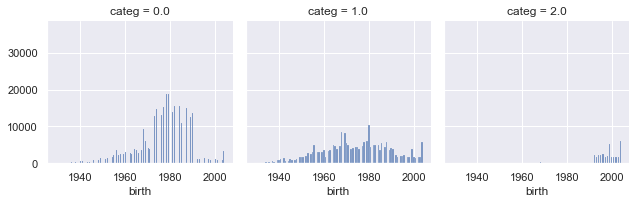

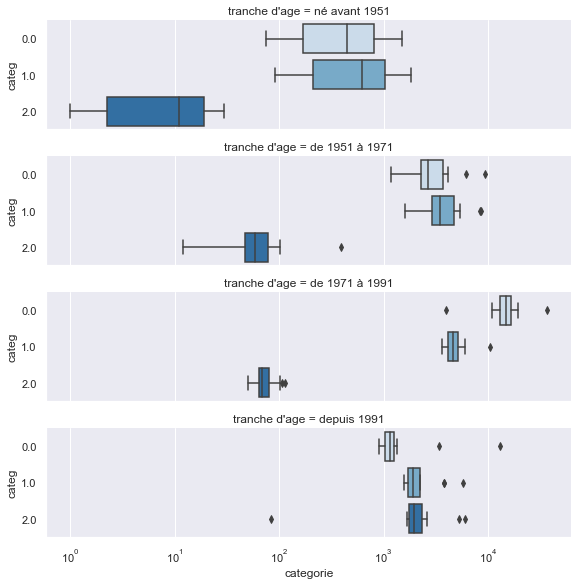

In [154]:
categorie_produit = dataf.groupby(['birth','categ']).agg(categorie=('categ','count'))

g = sns.FacetGrid(dataf, col="categ")
g.map(sns.histplot, "birth")


plt.show()
categorie_produit = categorie_produit.reset_index()

conditions = [ categorie_produit['birth']  < 1951,
                     (categorie_produit['birth'] >= 1951) & (categorie_produit['birth'] < 1971),
                     (categorie_produit['birth'] >= 1971) & (categorie_produit['birth'] < 1991),
                     categorie_produit['birth'] >= 1991 ]
choix =['né avant 1951','de 1951 à 1971','de 1971 à 1991','depuis 1991']
categorie_produit["tranche d'age"] =  np.select(conditions, choix)

g1 = sns.catplot(x = 'categorie',y="categ",row="tranche d'age",kind="box", palette="Blues",
                 orient="h",height=2, aspect=4, data = categorie_produit)
g1.set(xscale="log")
plt.show()

categ,0.0,1.0,2.0,Total
tranche d'age,,,,
de 1951 à 1971,63128,78393,1481,143002
de 1971 à 1991,310493,99411,1474,411378
depuis 1991,29569,33790,33265,96624
né avant 1951,12269,15575,263,28107
Total,415459,227169,36483,679111


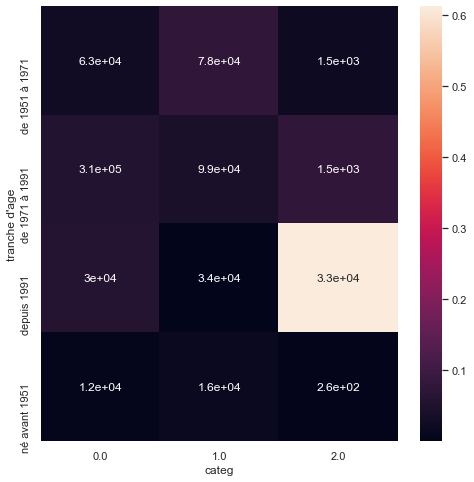

In [155]:

data = dataf.filter(items=("birth", "categ"))

conditions = [ data['birth']  < 1951,
                     (data['birth'] >= 1951) & (data['birth'] < 1971),
                     (data['birth'] >= 1971) & (data['birth'] < 1991),
                     data['birth'] >= 1991 ]
choix =['né avant 1951','de 1951 à 1971','de 1971 à 1991','depuis 1991']
data["tranche d'age"] =  np.select(conditions, choix)
X = "tranche d'age"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
display(cont)

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()